In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.keras.layers import TextVectorization

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [4]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [5]:
pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl 

In [6]:
import tensorflow as tf
import gradio as gr

In [7]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiofiles                         23.2.1
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0


In [8]:
df = pd.read_csv(os.path.join('dataset', 'train.csv'))

In [9]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [11]:
MAX_FEATURES = 200000 # number of words in the vocab

In [12]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [13]:
pip install tensorflow

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
print(vectorizer.get_vocabulary())

['', '[UNK]']


In [16]:
vectorizer = layers.TextVectorization(vocabulary=X.values)

In [17]:
vectorized_text = vectorizer(X.values)

In [18]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [19]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [20]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [21]:
from keras.optimizers import Adam

# Compile the model with accuracy as a metric
model.compile(optimizer=Adam(), loss='BinaryCrossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [23]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 624s 87ms/step - loss: 0.1407 - accuracy: 0.9907 - val_loss: 0.1387 - val_accuracy: 0.9935


In [23]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 588s 83ms/step - loss: 0.1405 - accuracy: 0.9883 - val_loss: 0.1396 - val_accuracy: 0.9947


In [24]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 594s 85ms/step - loss: 0.1386 - accuracy: 0.9942 - val_loss: 0.1360 - val_accuracy: 0.9940
Epoch 2/10
6981/6981 [==============================] - 598s 86ms/step - loss: 0.1388 - accuracy: 0.9942 - val_loss: 0.1382 - val_accuracy: 0.9939
Epoch 3/10
6981/6981 [==============================] - 601s 86ms/step - loss: 0.1388 - accuracy: 0.9938 - val_loss: 0.1379 - val_accuracy: 0.9942
Epoch 4/10
6981/6981 [==============================] - 603s 86ms/step - loss: 0.1386 - accuracy: 0.9941 - val_loss: 0.1390 - val_accuracy: 0.9942
Epoch 5/10
6981/6981 [==============================] - 618s 88ms/step - loss: 0.1394 - accuracy: 0.9944 - val_loss: 0.1368 - val_accuracy: 0.9944
Epoch 6/10
6981/6981 [==============================] - 621s 89ms/step - loss: 0.1393 - accuracy: 0.9941 - val_loss: 0.1378 - val_accuracy: 0.9938
Epoch 7/10
6981/6981 [==============================] - 618s 88ms/step - loss: 0.1388 - accuracy: 0.9942 - val_loss: 0

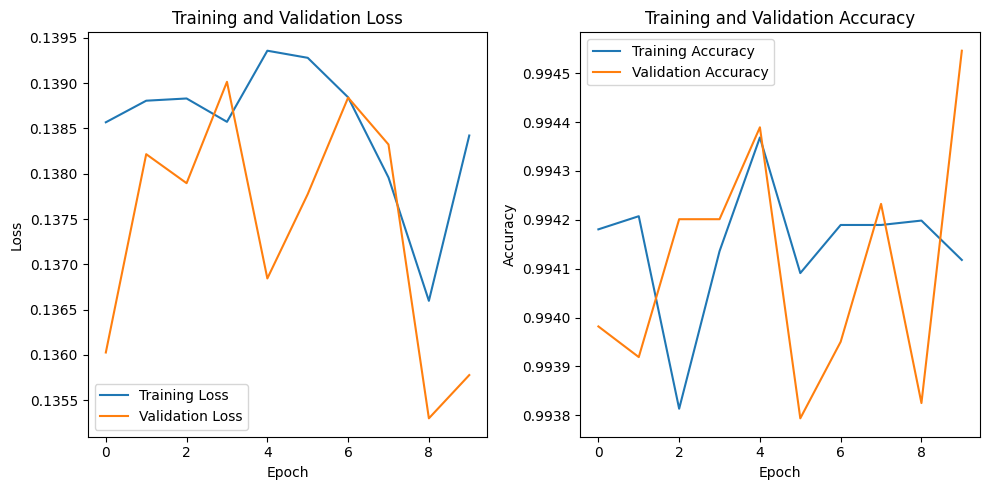

In [27]:
import matplotlib.pyplot as plt

# Access training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [29]:
print(history.history['accuracy'])

[0.9941806197166443, 0.994207501411438, 0.9938135743141174, 0.994135856628418, 0.9943686723709106, 0.9940910935401917, 0.9941895604133606, 0.9941895604133606, 0.9941985607147217, 0.9941179752349854]


In [30]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
pip install tensorflow

In [31]:
import tensorflow as tf

In [32]:
print(input_text.shape)

(9,)


In [33]:
print(model.input_shape)

(None, None)


In [34]:
input_text = tf.expand_dims(input_text, axis=0)

In [35]:
res = model.predict(input_text)

1/1 [==============================] - 1s 1s/step


In [36]:
(res > 0.5).astype(int)

array([[1, 1, 1, 1, 1, 0]])

In [37]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [38]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 994ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [39]:
res.shape

(1, 6)

In [40]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 49ms/step


In [42]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.0, Recall:0.0, Accuracy:0.11835506558418274


In [43]:
model.save('toxicity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
model = tf.keras.models.load_model('toxicity.h5')

In [45]:
input_str = vectorizer('hey i freaken hate you!')

In [46]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 655ms/step


In [47]:
res

array([[0.92421097, 0.9625111 , 0.9592264 , 0.9502946 , 0.9571308 ,
        0.01175215]], dtype=float32)

In [48]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [49]:
pip install gradio

In [50]:
import gradio as gr
from gradio import Textbox

In [51]:
interface = gr.Interface(fn=score_comment,
                        inputs=Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [52]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4e369c207c9cc6e4f4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
